In [1]:
import gdown
import pandas as pd

# Define the file ID and construct the download URL
download_url = f'https://docs.google.com/spreadsheets/d/18eR6DBe5TMWU9FnIewaGtsepDbV4BOyr/export?format=xlsx'
output_file = 'downloaded_file.xlsx'

# Download the file
gdown.download(download_url, output_file, quiet=False)


/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://docs.google.com/spreadsheets/d/18eR6DBe5TMWU9FnIewaGtsepDbV4BOyr/export?format=xlsx
To: /content/downloaded_file.xlsx
17.2MB [00:00, 17.7MB/s]


'downloaded_file.xlsx'

In [4]:
# Read the file into a DataFrame
import pandas as pd
df = pd.read_excel("/content/downloaded_file.xlsx")

# Display the DataFrame
print(df.head())


                                     id   item_date quantity tons    customer  \
0  EC06F063-9DF0-440C-8764-0B0C05A4F6AE  20210401.0     54.151139  30156308.0   
1  4E5F4B3D-DDDF-499D-AFDE-A3227EC49425  20210401.0    768.024839  30202938.0   
2  E140FF1B-2407-4C02-A0DD-780A093B1158  20210401.0    386.127949  30153963.0   
3  F8D507A0-9C62-4EFE-831E-33E1DA53BB50  20210401.0    202.411065  30349574.0   
4  4E1C4E78-152B-430A-8094-ADD889C9D0AD  20210401.0    785.526262  30211560.0   

   country status item type  application  thickness   width  \
0     28.0    Won         W         10.0       2.00  1500.0   
1     25.0    Won         W         41.0       0.80  1210.0   
2     30.0    Won        WI         28.0       0.38   952.0   
3     32.0    Won         S         59.0       2.30  1317.0   
4     28.0    Won         W         10.0       4.00  2000.0   

                               material_ref  product_ref  delivery date  \
0                               DEQ1 S460MC   1670798778   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
list=["id","item_date","customer","country","quantity tons","application","thickness","width","delivery date","selling_price"]
for i in list:
  df.dropna(subset=i,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181638 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181638 non-null  object 
 1   item_date      181638 non-null  float64
 2   quantity tons  181638 non-null  object 
 3   customer       181638 non-null  float64
 4   country        181638 non-null  float64
 5   status         181636 non-null  object 
 6   item type      181638 non-null  object 
 7   application    181638 non-null  float64
 8   thickness      181638 non-null  float64
 9   width          181638 non-null  float64
 10  material_ref   103752 non-null  object 
 11  product_ref    181638 non-null  int64  
 12  delivery date  181638 non-null  float64
 13  selling_price  181638 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 20.8+ MB


In [8]:
delete_row=df[df['quantity tons']=="e"].index
df = df.drop(delete_row)

In [9]:
df['quantity tons']=df["quantity tons"].astype(float)

In [10]:
df['material_ref'].fillna('unknown', inplace=True)

In [11]:
d=df[['quantity tons','customer','country','application','thickness','width','product_ref',"selling_price"]]

<class 'pandas.core.frame.DataFrame'>
Index: 181637 entries, 0 to 181672
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181637 non-null  float64
 1   customer       181637 non-null  float64
 2   country        181637 non-null  float64
 3   application    181637 non-null  float64
 4   thickness      181637 non-null  float64
 5   width          181637 non-null  float64
 6   product_ref    181637 non-null  int64  
 7   selling_price  181637 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 12.5 MB


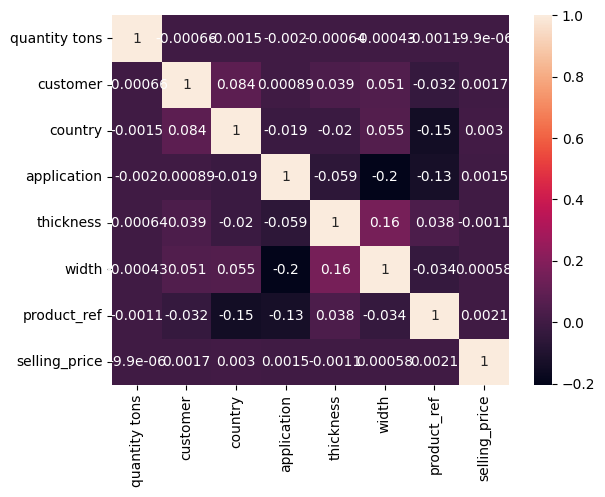

In [ ]:
import seaborn as sns
d.head()
sns.heatmap(d.corr(),annot=True)
d.info()

<ipython-input-12-fd97d706fc1b>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['quantity tons'])


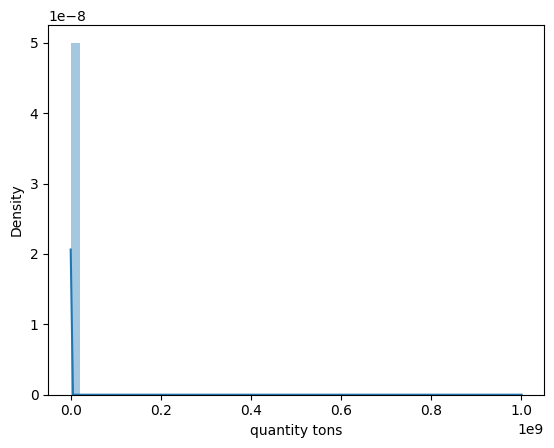

<ipython-input-12-fd97d706fc1b>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['country'])


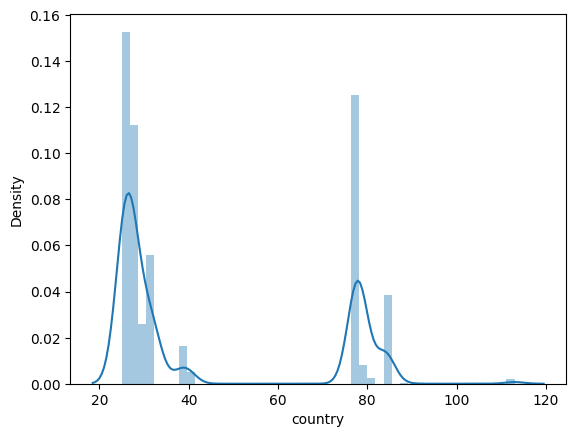

<ipython-input-12-fd97d706fc1b>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['application'])


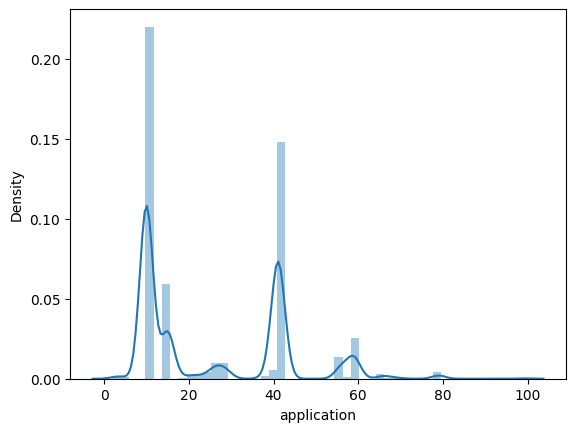

<ipython-input-12-fd97d706fc1b>:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['thickness'])


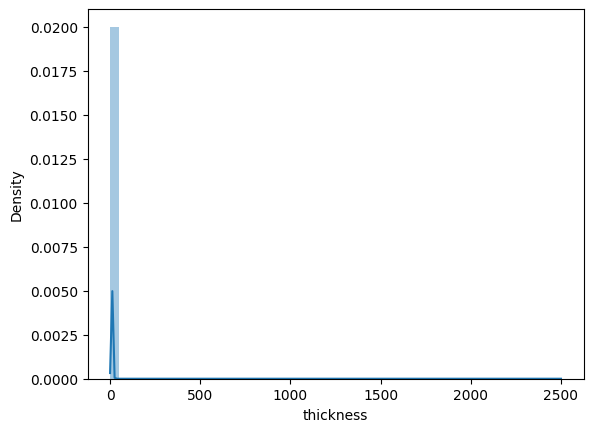

<ipython-input-12-fd97d706fc1b>:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['width'])


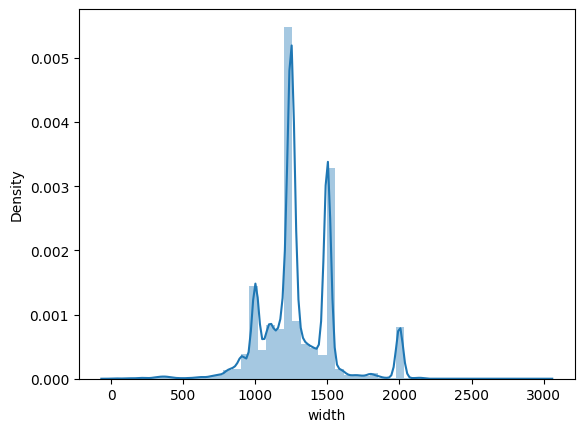

<ipython-input-12-fd97d706fc1b>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['selling_price'])


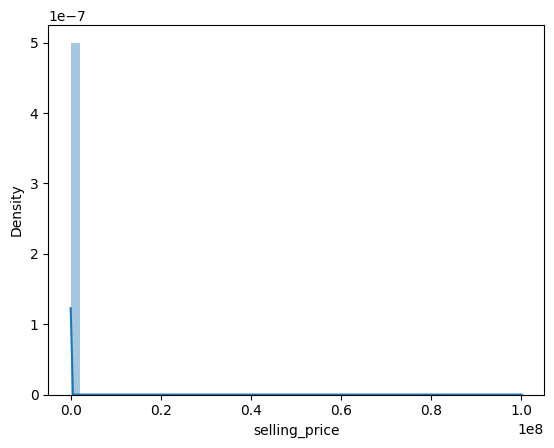

In [12]:
# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']
df_p=df
df_p['quantity tons']   # skewed
df_p['country']
df_p['application']
df_p['thickness']       # skewed
df_p['width']
df_p['selling_price']   # skewed

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_p['quantity tons'])
plt.show()
sns.distplot(df_p['country'])
plt.show()
sns.distplot(df_p['application'])
plt.show()
sns.distplot(df_p['thickness'])
plt.show()
sns.distplot(df_p['width'])
plt.show()
sns.distplot(df_p['selling_price'])
plt.show()

In [13]:
import numpy as np
mask1 = df_p['selling_price'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'selling_price'] = np.nan

mask1 = df_p['quantity tons'] <= 0
print(mask1.sum())
df_p.loc[mask1, 'quantity tons'] = np.nan

mask1 = df_p['thickness'] <= 0
print(mask1.sum())

7
4
0


<ipython-input-14-ccfc80271a13>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['selling_price_log'])


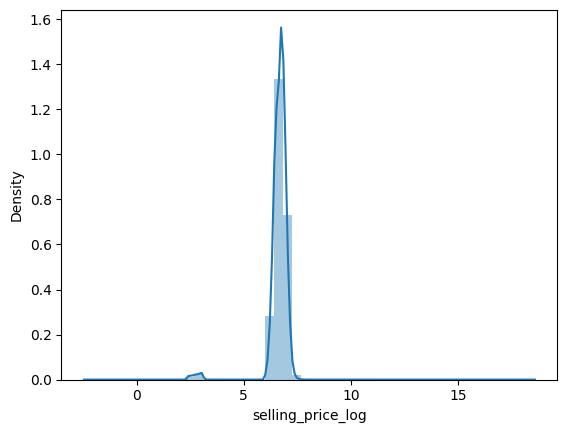

<ipython-input-14-ccfc80271a13>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['quantity tons_log'])


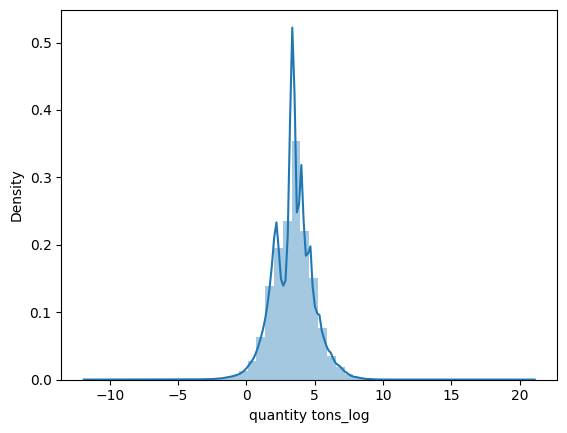

<ipython-input-14-ccfc80271a13>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_p['thickness_log'])


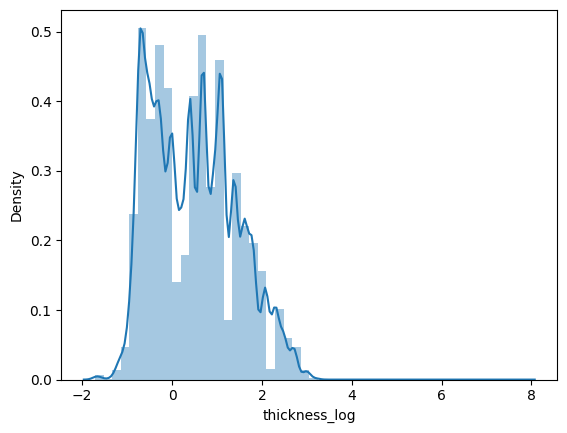

In [14]:
import numpy as np
df_p['selling_price_log'] = np.log(df_p['selling_price'])
sns.distplot(df_p['selling_price_log'])
plt.show()

df_p['quantity tons_log'] = np.log(df_p['quantity tons'])
sns.distplot(df_p['quantity tons_log'])
plt.show()

df_p['thickness_log'] = np.log(df_p['thickness'])
sns.distplot(df_p['thickness_log'])
plt.show()
# reverts log
# df_p['reverted_values'] = np.exp(df_p['selling_price_log'])
# sns.distplot(df_p['reverted_values'])
# plt.show()

In [16]:
pip install lazypredict

In [38]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181626 entries, 0 to 181672
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 181626 non-null  object 
 1   item_date          181626 non-null  float64
 2   quantity tons      181626 non-null  float64
 3   customer           181626 non-null  float64
 4   country            181626 non-null  float64
 5   status             181624 non-null  object 
 6   item type          181626 non-null  object 
 7   application        181626 non-null  float64
 8   thickness          181626 non-null  float64
 9   width              181626 non-null  float64
 10  material_ref       181626 non-null  object 
 11  product_ref        181626 non-null  int64  
 12  delivery date      181626 non-null  float64
 13  selling_price      181626 non-null  float64
 14  selling_price_log  181626 non-null  float64
 15  quantity tons_log  181626 non-null  float64
 16  thickne

In [41]:
df_p.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.00,54.15,30156308.00,28.00,Won,W,10.00,2.00,1500.00,DEQ1 S460MC,1670798778,20210701.00,854.00,6.75,3.99,0.69
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.00,768.02,30202938.00,25.00,Won,W,41.00,0.80,1210.00,0000000000000000000000000000000000104991,1668701718,20210401.00,1047.00,6.95,6.64,-0.22
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.00,386.13,30153963.00,30.00,Won,WI,28.00,0.38,952.00,S0380700,628377,20210101.00,644.33,6.47,5.96,-0.97
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.00,202.41,30349574.00,32.00,Won,S,59.00,2.30,1317.00,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.00,768.00,6.64,5.31,0.83
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.00,785.53,30211560.00,28.00,Won,W,10.00,4.00,2000.00,2_S275JR+AR-CL1,640665,20210301.00,577.00,6.36,6.67,1.39


In [47]:
# Handle missing values
df_p['status'].fillna(df_p['status'].mode()[0], inplace=True)

In [58]:
# @title RandomForestRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the data
df = df_p

# Define features and target
X = df[['customer', 'country', 'status', 'item type',
        'application','width', 'product_ref',
        'quantity tons_log', 'thickness_log']]
y = df['selling_price_log']

# Preprocessing pipeline for numerical features
numerical_features = ['application','customer','country','width', 'product_ref', 'quantity tons_log', 'thickness_log']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing pipeline for categorical features
categorical_features = ['status','item type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 0.14372941898014777
R-squared: 0.9335666065214371


In [59]:
# prompt: convert the model to a pickle file
import pickle
# Save the model to a pickle file
with open('RandomForestRegressor.pkl', 'wb') as f:
    pickle.dump(model, f)

In [54]:
# @title LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define features and target
X = df_p[['customer', 'country', 'selling_price_log', 'item type',
        'application','width', 'product_ref',
        'quantity tons_log', 'thickness_log']]
y = df_p['status']

# Preprocessing pipeline for numerical features
numerical_features = ['application','customer','country','width', 'product_ref', 'quantity tons_log', 'thickness_log','selling_price_log']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing pipeline for categorical features
categorical_features = ['item type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6705114793811595
Classification Report:
                  precision    recall  f1-score   support

          Draft       1.00      1.00      1.00       609
           Lost       0.45      0.26      0.33      6806
Not lost for AM       0.00      0.00      0.00      3950
      Offerable       0.00      0.00      0.00         4
        Offered       0.00      0.00      0.00        14
        Revised       0.00      0.00      0.00       838
 To be approved       0.00      0.00      0.00       837
            Won       0.69      0.95      0.80     23268

       accuracy                           0.67     36326
      macro avg       0.27      0.28      0.27     36326
   weighted avg       0.54      0.67      0.59     36326



In [60]:
# @title RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define features and target
X = df_p[['customer', 'country', 'selling_price_log', 'item type',
        'application','width', 'product_ref',
        'quantity tons_log', 'thickness_log']]
y = df_p['status']

# Preprocessing pipeline for numerical features
numerical_features = ['application','customer','country','width', 'product_ref', 'quantity tons_log', 'thickness_log','selling_price_log']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing pipeline for categorical features
categorical_features = ['item type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier (n_estimators=100,random_state=42))])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8634862082255134
Classification Report:
                  precision    recall  f1-score   support

          Draft       1.00      1.00      1.00       609
           Lost       0.82      0.80      0.81      6806
Not lost for AM       0.77      0.68      0.72      3950
      Offerable       1.00      0.50      0.67         4
        Offered       0.67      0.29      0.40        14
        Revised       0.52      0.37      0.44       838
 To be approved       0.81      0.66      0.73       837
            Won       0.90      0.93      0.92     23268

       accuracy                           0.86     36326
      macro avg       0.81      0.65      0.71     36326
   weighted avg       0.86      0.86      0.86     36326



In [61]:
# convert the model to a pickle file
import pickle
# Save the model to a pickle file
with open('RandomForestClassifier.pkl', 'wb') as f:
    pickle.dump(model, f)